#

# Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


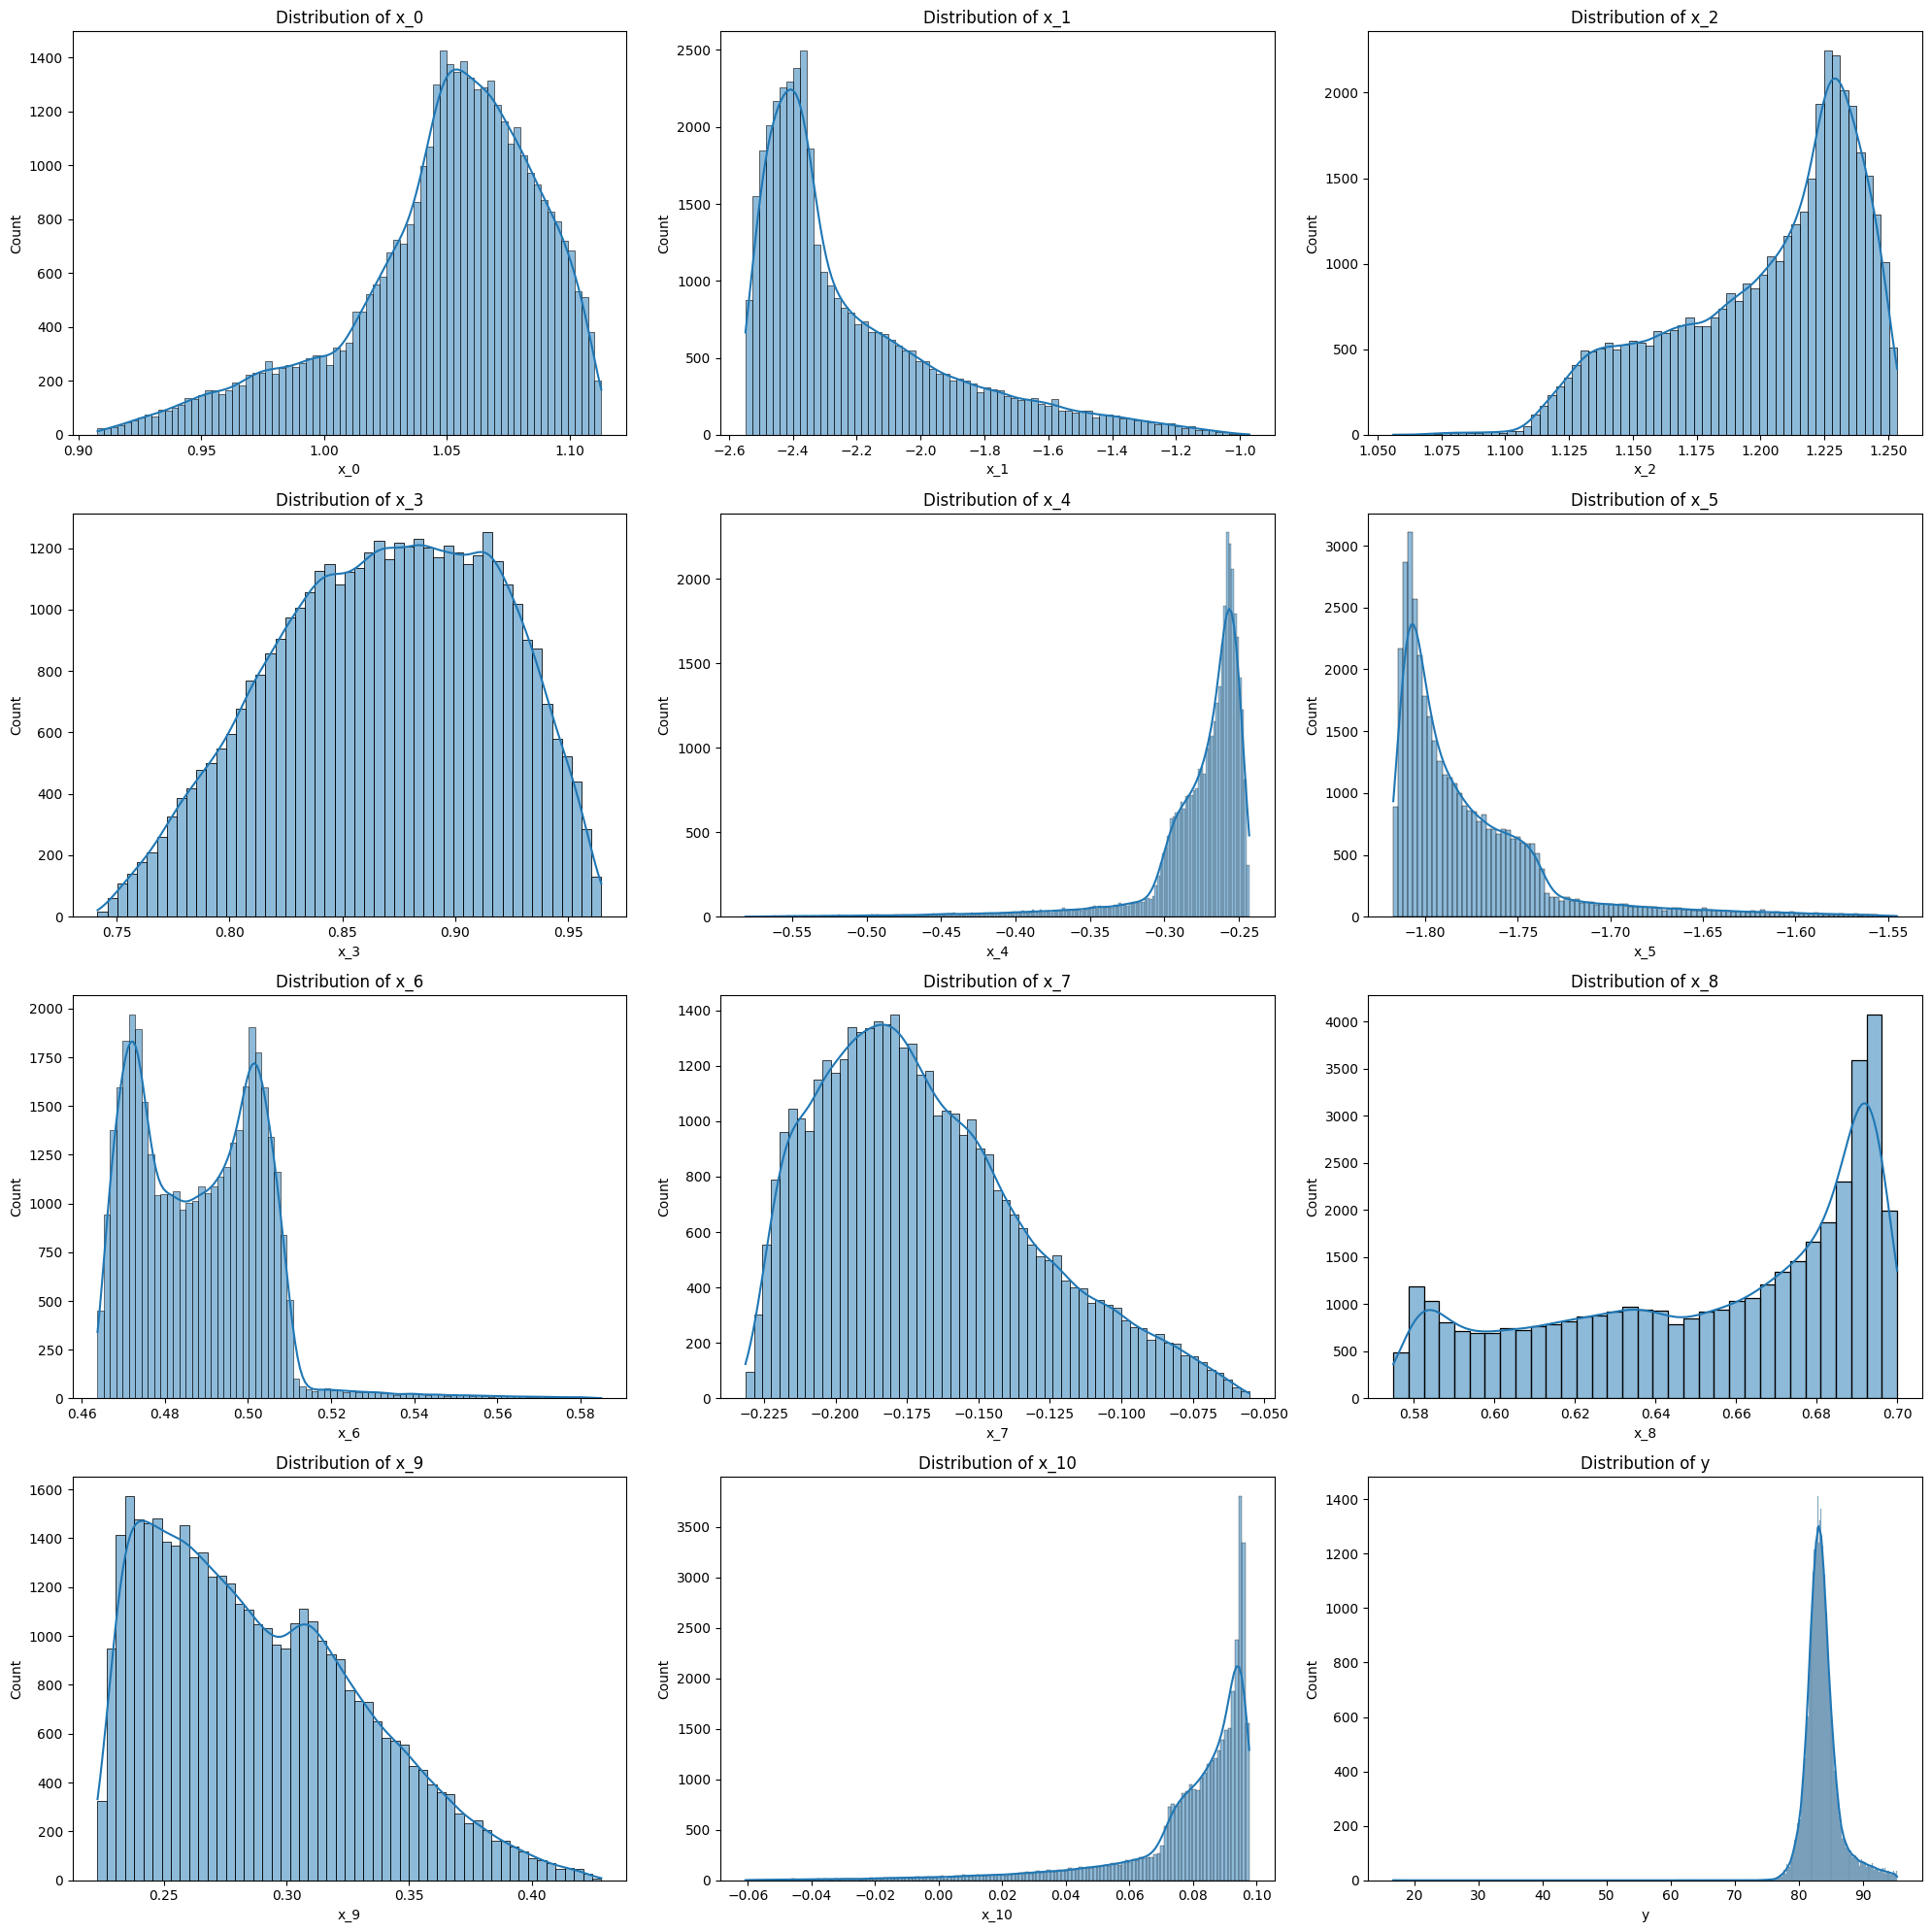

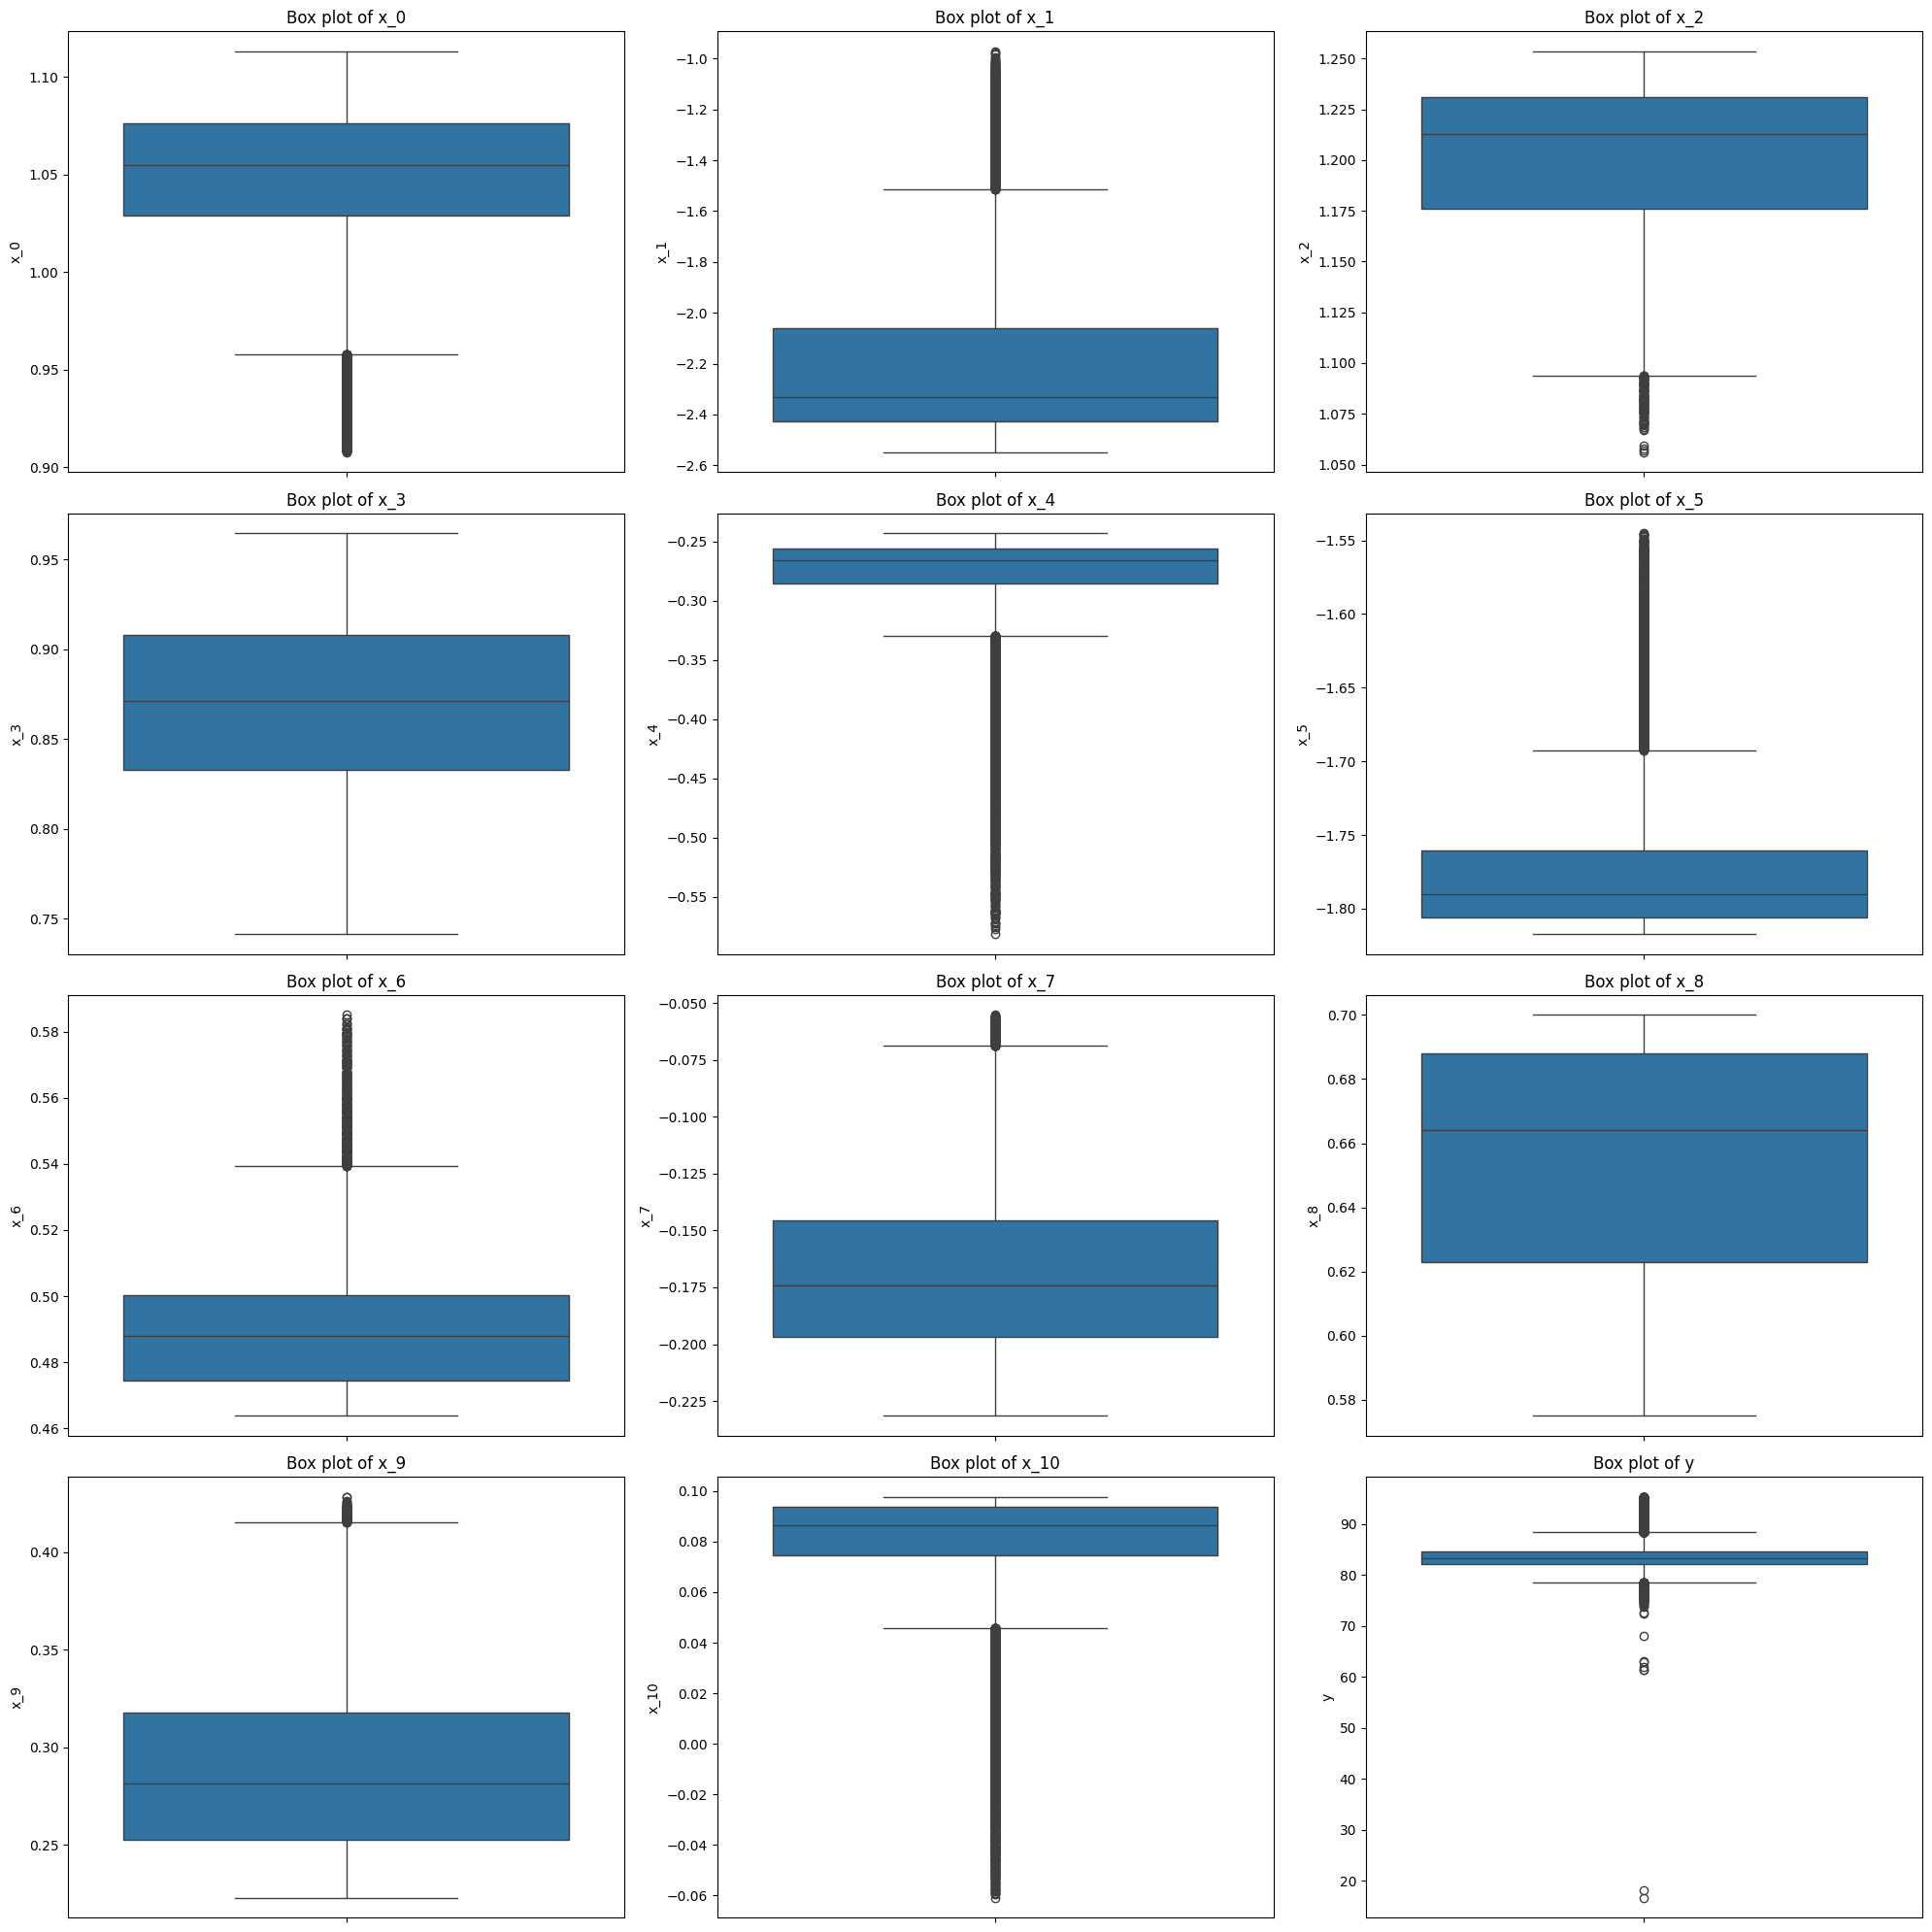

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/test.csv')

# Create histograms for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(train_df.columns[1:]):  # Skip the ID column
    sns.histplot(train_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Create box plots for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(train_df.columns[1:]):  # Skip the ID column
    sns.boxplot(y=train_df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

RangeIndex(start=0, stop=40118, step=1) 0        1.006187
1        1.024647
2        1.062444
3        1.089189
4        1.023323
           ...   
40113    1.071602
40114    1.104710
40115    1.084876
40116    0.994186
40117    1.090381
Name: x_0, Length: 40118, dtype: float64
RangeIndex(start=0, stop=40118, step=1) 0       -1.962566
1       -2.472625
2       -2.451003
3       -2.458470
4       -2.133468
           ...   
40113   -2.162285
40114   -2.280343
40115   -2.143004
40116   -1.562092
40117   -2.379771
Name: x_1, Length: 40118, dtype: float64
RangeIndex(start=0, stop=40118, step=1) 0        1.247535
1        1.144386
2        1.186546
3        1.184531
4        1.242266
           ...   
40113    1.243174
40114    1.226507
40115    1.244276
40116    1.227734
40117    1.172301
Name: x_2, Length: 40118, dtype: float64
RangeIndex(start=0, stop=40118, step=1) 0        0.926500
1        0.846499
2        0.873599
3        0.810867
4        0.939837
           ...   
40113    0.9239

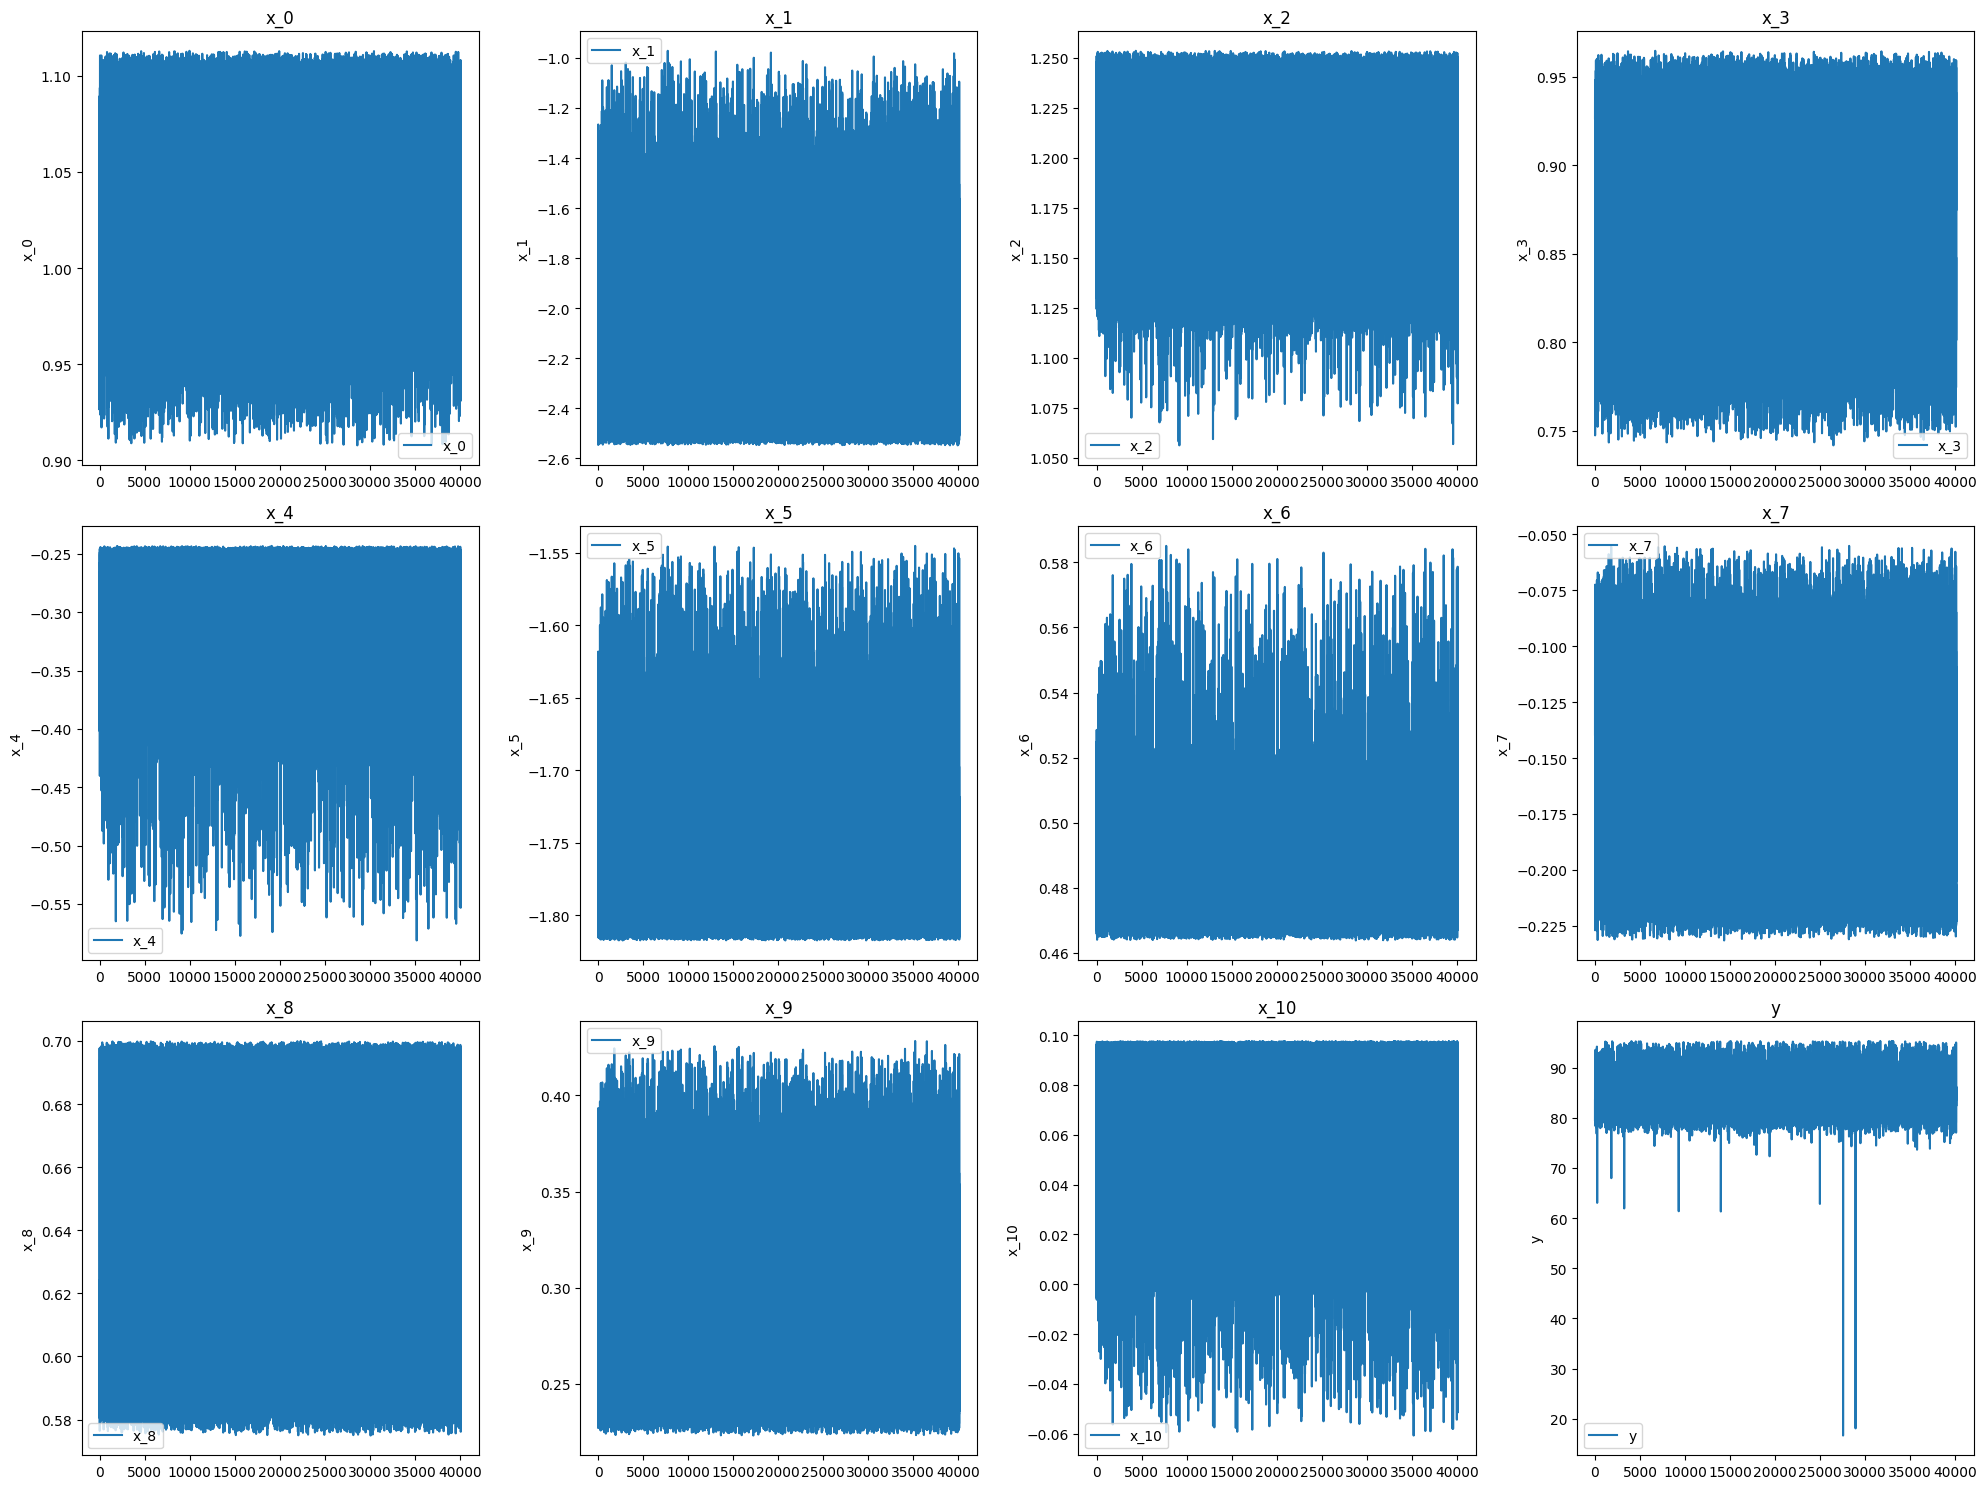

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#train_df = pd.read_csv('train.csv')


# Determine the number of columns and rows for the subplot grid
num_cols = 4
num_rows = 3

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

train_df=train_df[]

# Plot each column as a time series
for i, column in enumerate(train_df.columns[1:]):
    if i < len(axes):
        axes[i].plot(train_df.index, train_df[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
for i, column in enumerate(train_df.columns[1:]):
  print(column)
  print(i)

x_0
0
x_1
1
x_2
2
x_3
3
x_4
4
x_5
5
x_6
6
x_7
7
x_8
8
x_9
9
x_10
10
y
11


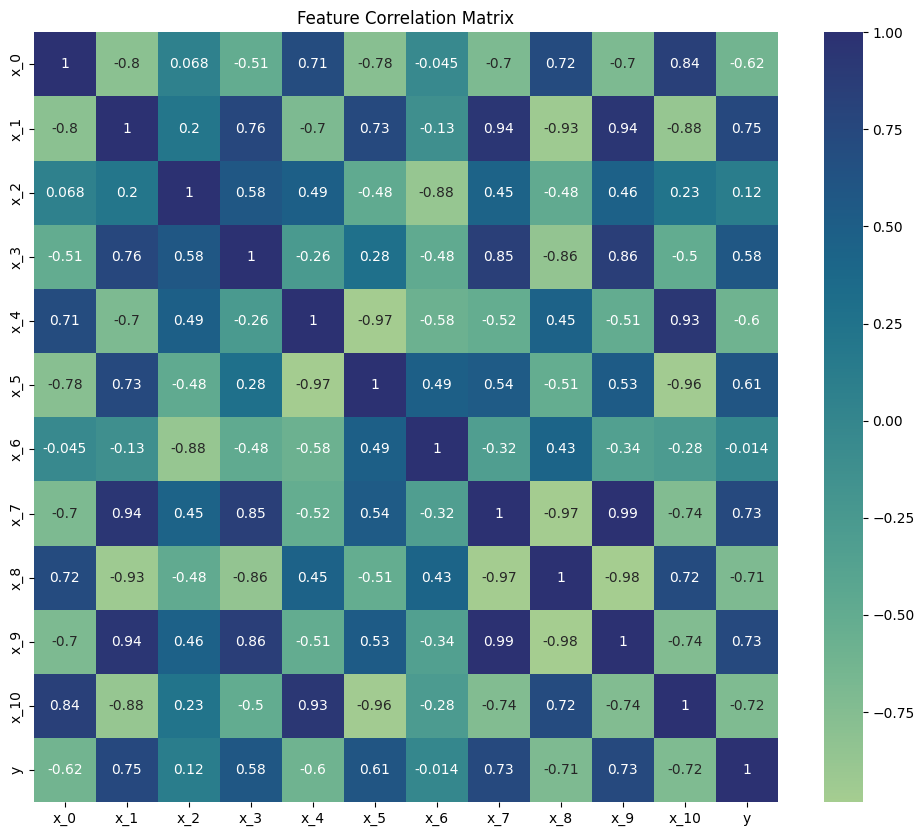

In [ ]:
# Check for correlations
correlation_matrix = train_df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()



# 모델

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


if os.path.exists("/content/baseline_model_saved.pkl"):
  model = joblib.load("baseline_model_saved.pkl")

else:
  X = train_df.iloc[:, 1:-1]  # Features
  y = train_df['y']  # Target

  # Train model
  model = RandomForestRegressor(n_estimators=300, random_state=42)
  cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
  print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

  # Train on full dataset
  model.fit(X, y)

  joblib.dump(model, "baseline_model_saved.pkl")

Cross-validation MSE: 2.8926 (+/- 0.8657)


In [ ]:


# Predict on test data
X_test = test_df.iloc[:, 1:]
y_pred = model.predict(X_test)

# Identify top 5% of predicted values
threshold = np.percentile(y_pred, 95)
top_5_percent_mask = y_pred >= threshold

# Create submission file
submission_df = pd.read_csv('/content/dacon_data/sample_submission.csv')
submission_df['y'] = y_pred
submission_df.to_csv('/updated_submission.csv', index=False)

print(f"Top 5% threshold: {threshold:.4f}")
print(f"Number of samples in top 5%: {sum(top_5_percent_mask)}")

Top 5% threshold: 92.0256
Number of samples in top 5%: 250
